# Entrenando modelo de Regresión Lineal

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Cargar los datos

In [4]:
df = pd.read_csv("../data/processed/cleaned_cars_data.csv")

### Preparación de datos

In [5]:
exclude_columns = ["Precio (ARS)","Versión","Motor"]
# Convertir variables categóricas en variables dummy (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['Marca', 'Modelo', 'Combustible', 'Carrocería','Cilindrada',"Color","Transmisión","Ubicación"]) #Convierte categorias en esclaas numericas (0,1,2...)

# Separar variables predictoras (X) y objetivo (y)
X = df_encoded.drop(columns=exclude_columns, axis=1)
y = df_encoded['Precio (ARS)']

# Escalar las características numéricas [0..1]
scaler = MinMaxScaler()
X[['KM']] = scaler.fit_transform(X[['KM']]) #

### Dividir en Conjunto de Entrenamiento y Prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenar el modelo

In [7]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Evaluación del Modelo

In [8]:
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 Métricas del Modelo:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

📊 Métricas del Modelo:
MAE: 4557765.06
MSE: 51693724388270.59
RMSE: 7189834.80
R²: 0.6399


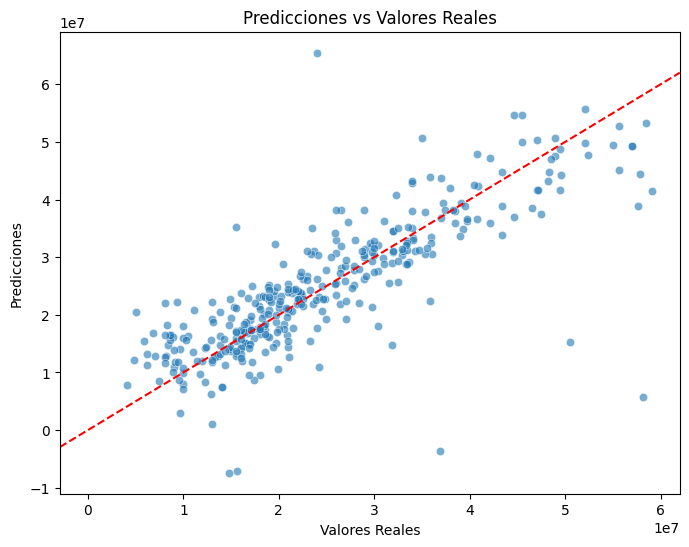

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Línea ideal
plt.show()

### RANDOM FOREST MODEL

In [10]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df_cleaned = pd.read_csv("../data/processed/cleaned_cars_data.csv")

exclude_columns = ["Precio (ARS)","Versión","Motor"]
df_encoded = pd.get_dummies(df_cleaned, columns=['Marca', 'Modelo', 'Combustible', 'Carrocería','Cilindrada',"Color","Transmisión","Ubicación"])

# Dividir los datos en características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=exclude_columns)  # Aquí eliminarás la columna de 'Precio (ARS)'
y = df_encoded['Precio (ARS)']

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar las predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo utilizando las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 3767565.7410680884
MSE: 34680172144012.793
RMSE: 7189834.795617392
R²: 0.7583998336278148


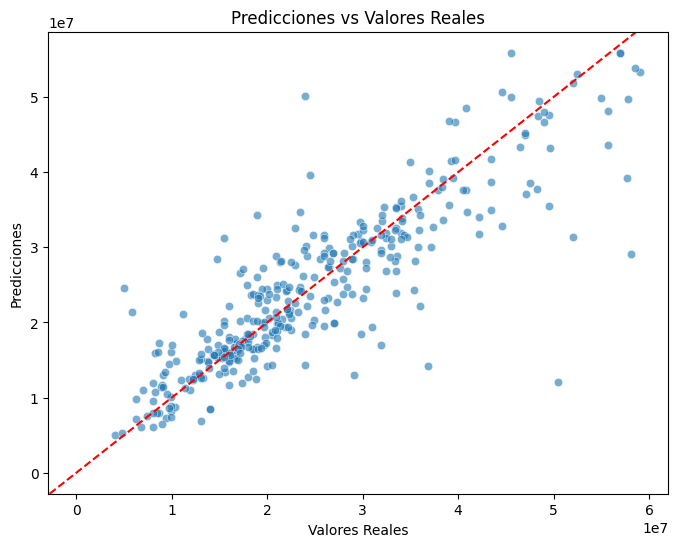

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Línea ideal
plt.show()